In [1]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 8.3 MB/s 
     |████████████████████████████████| 1.2 MB 42.4 MB/s 
     |████████████████████████████████| 362 kB 34.1 MB/s 
     |████████████████████████████████| 4.4 MB 44.1 MB/s 
     |████████████████████████████████| 140 kB 43.0 MB/s 
     |████████████████████████████████| 212 kB 47.8 MB/s 
     |████████████████████████████████| 101 kB 13.1 MB/s 
     |████████████████████████████████| 1.1 MB 52.4 MB/s 
     |████████████████████████████████| 596 kB 47.3 MB/s 
     |████████████████████████████████| 127 kB 51.4 MB/s 
     |████████████████████████████████| 271 kB 52.8 MB/s 
     |████████████████████████████████| 144 kB 61.7 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████████████████████████| 6.6 MB 47.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstal

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dataset_projekt')
path = Path('/content/drive/My Drive/dataset_projekt')

Mounted at /content/drive


In [3]:
klasy = '992 Turbo', ' F8 Tributo', 'Huracan Evo' # w tym miejscu wpisujemy nazwę obiektu, który chcemy wyszukać np. 'pies' i 'kot'
path = Path('treningowe') # podajemy nazwę folderu, w którym znajdą się pliki
if not path.exists(): # folder zostanie dla nas stworzony, jeżeli jeszcze go nie mamy
  path.mkdir()
  for o in klasy:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} car', max_images=100) # w miejsce keyword podajemy dodatkowe słowo kluczowe do wyszukiwarki np. "zwierzaki"
    download_images(dest, urls=urls)

In [4]:
classes = ['992 Turbo', ' F8 Tributo', 'Huracan Evo']

In [5]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [6]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), # Określamy ilość materiałów treningowych oraz walidacyjnych, wielkość zdjęć, augmentację
    batch_tfms=aug_transforms(max_rotate=2.0, p_affine=0.5)
)
dls = data.dataloaders(path, bs = 32, num_workers = 0)

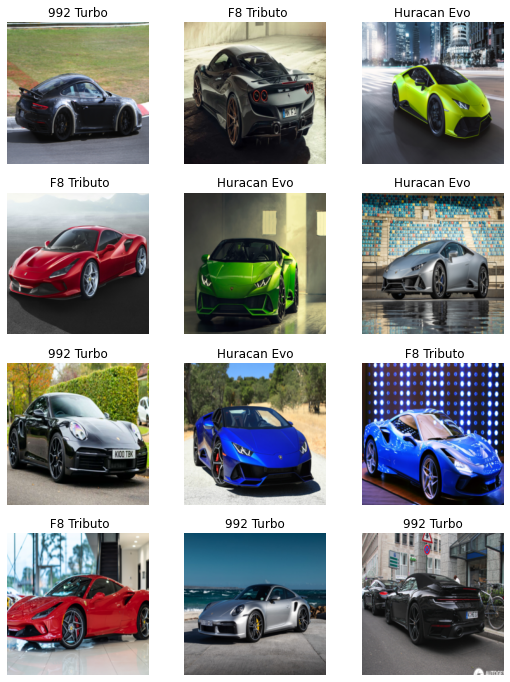

In [7]:
dls.valid.show_batch(max_n=12, nrows=4)

In [8]:
learn = vision_learner(dls, alexnet, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [9]:
learn.fit(6)

epoch,train_loss,valid_loss,accuracy,time
0,1.358745,1.261169,0.593220,00:51
1,1.105992,0.957314,0.677966,00:49
2,1.013049,0.855297,0.745763,00:48
3,0.885458,0.760883,0.779661,00:48
4,0.792595,0.723223,0.813559,00:50
5,0.706074,0.667283,0.830508,00:48


In [10]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [11]:
learn.export(fname='model.pkl')